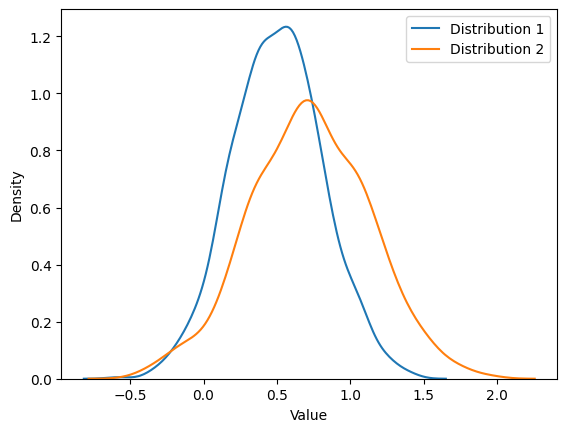

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate sample data for the plot
data1 = np.random.normal(0.5, 0.3, 1000)
data2 = np.random.normal(0.7, 0.4, 1000)

# Create a density plot
sns.kdeplot(data1, label="Distribution 1")
sns.kdeplot(data2, label="Distribution 2")

# Add labels
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

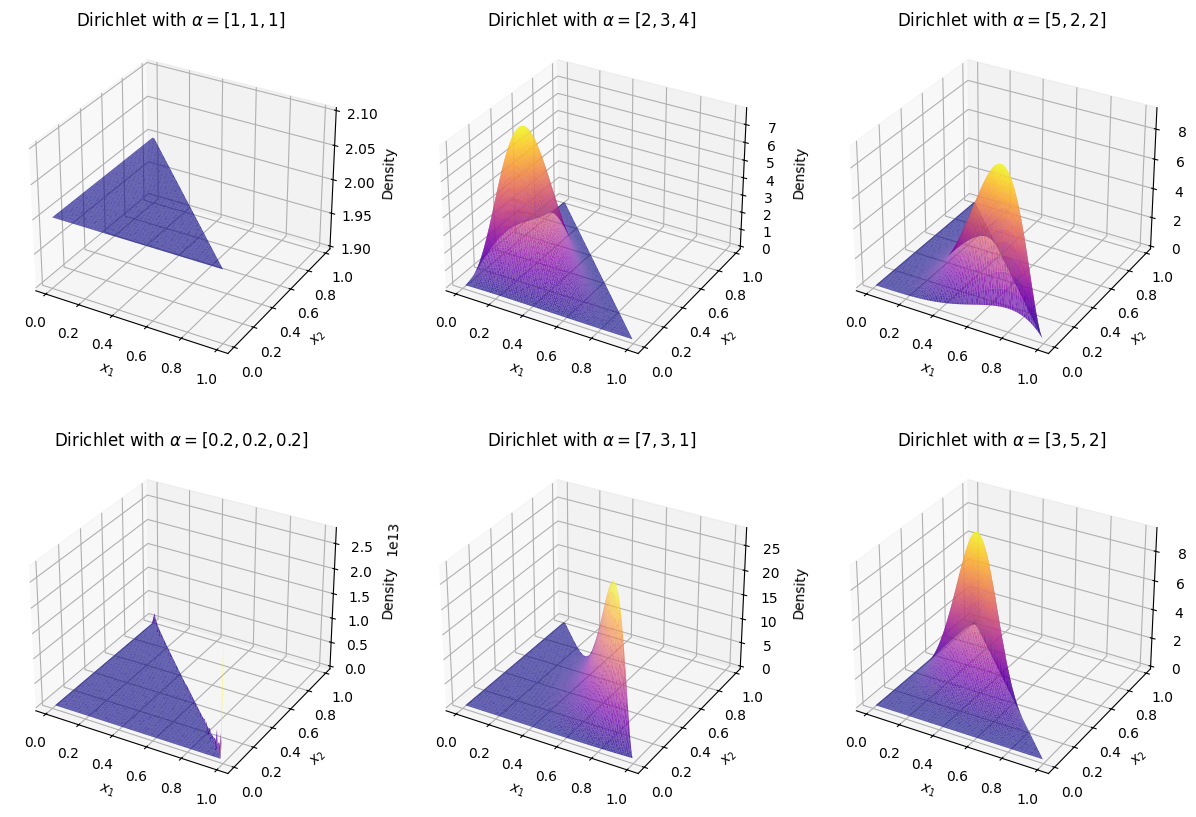

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet

# Define the alpha parameters for the Dirichlet distributions
alphas = [
    [1, 1, 1],
    [2, 3, 4],
    [5, 2, 2],
    [0.2, 0.2, 0.2],
    [7, 3, 1],
    [3, 5, 2]
]

# Create a grid of subplots
fig = plt.figure(figsize=(15, 10))

# Generate Dirichlet distributions and plot them
for i, alpha in enumerate(alphas):
    ax = fig.add_subplot(2, 3, i + 1, projection='3d')

    # Create a meshgrid for x1 and x2
    x1 = np.linspace(0.01, 0.99, 100)
    x2 = np.linspace(0.01, 0.99, 100)
    X1, X2 = np.meshgrid(x1, x2)
    X3 = 1 - X1 - X2

    # Mask invalid values where X3 is negative
    mask = X3 > 0
    X1 = X1[mask]
    X2 = X2[mask]
    X3 = X3[mask]
    X = np.vstack([X1, X2, X3])

    # Compute the Dirichlet PDF
    pdf = dirichlet.pdf(X, alpha)

    # Plot the surface with enhanced color contrast
    surf = ax.plot_trisurf(X1, X2, pdf, cmap='plasma', alpha=0.8)
    ax.set_title(r'Dirichlet with $\alpha={}$'.format(alpha))
    ax.set_xlabel(r'$x_1$')
    ax.set_ylabel(r'$x_2$')
    ax.set_zlabel('Density')  # Explicitly set the z-axis label for each subplot

# plt.tight_layout()
plt.savefig('dirichlet_distributions_0.png')
plt.show()


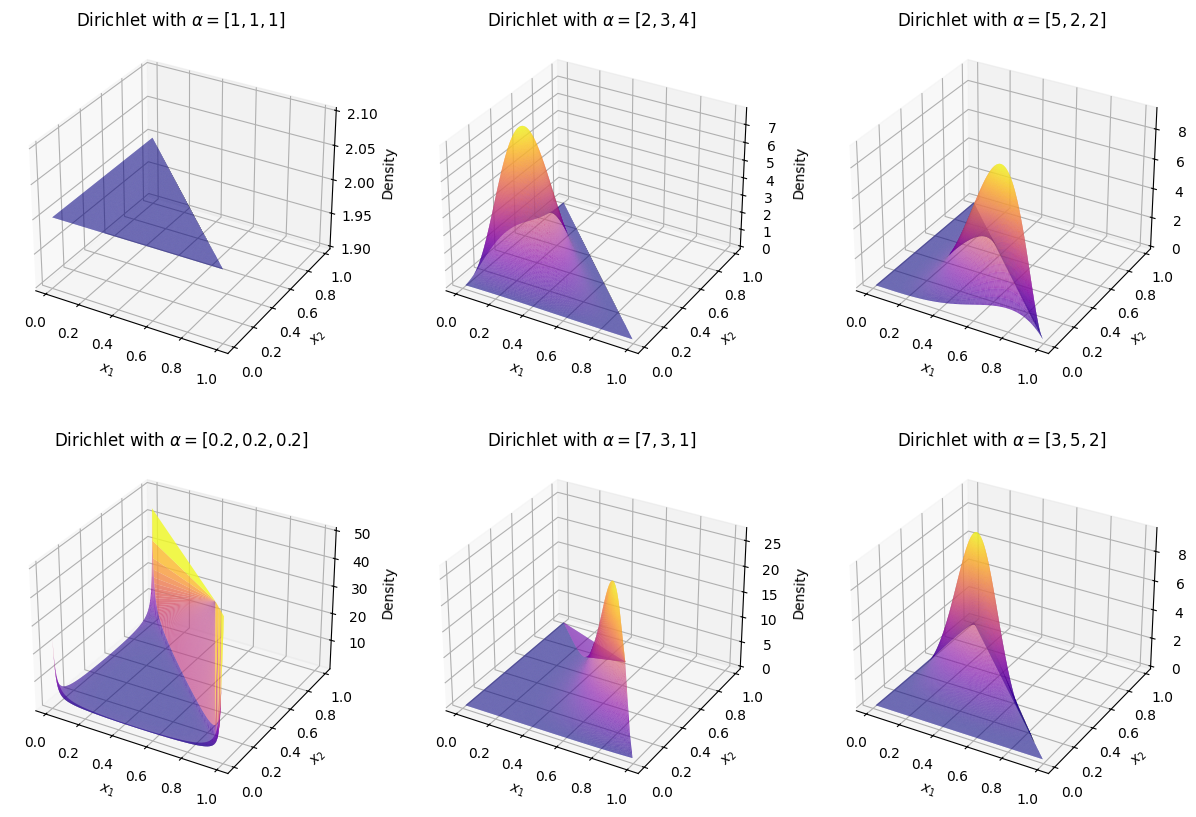

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet

# Define the alpha parameters for the Dirichlet distributions
alphas = [
    [1, 1, 1],
    [2, 3, 4],
    [5, 2, 2],
    [0.2, 0.2, 0.2],
    [7, 3, 1],
    [3, 5, 2]
]

# Create a grid of subplots
fig = plt.figure(figsize=(15, 10))

# Generate Dirichlet distributions and plot them
for i, alpha in enumerate(alphas):
    ax = fig.add_subplot(2, 3, i + 1, projection='3d')

    # Create a meshgrid for x1 and x2
    x1 = np.linspace(0.01, 0.99, 200)  # Increased resolution
    x2 = np.linspace(0.01, 0.99, 200)
    X1, X2 = np.meshgrid(x1, x2)
    X3 = 1 - X1 - X2

    # Mask invalid values where X3 is negative
    mask = X3 > 0
    X1 = X1[mask]
    X2 = X2[mask]
    X3 = X3[mask]
    X = np.vstack([X1, X2, X3])

    # Compute the Dirichlet PDF and clip extreme values
    pdf = dirichlet.pdf(X, alpha)
    pdf = np.clip(pdf, 0, 50)  # Limit maximum density value to 50

    # Plot the surface with enhanced color contrast
    surf = ax.plot_trisurf(X1, X2, pdf, cmap='plasma', alpha=0.8)
    ax.set_title(r'Dirichlet with $\alpha={}$'.format(alpha))
    ax.set_xlabel(r'$x_1$')
    ax.set_ylabel(r'$x_2$')
    ax.set_zlabel('Density')  # Explicitly set the z-axis label for each subplot

# plt.tight_layout()
plt.savefig('dirichlet_distributions.png')
plt.show()

搞pdf分布

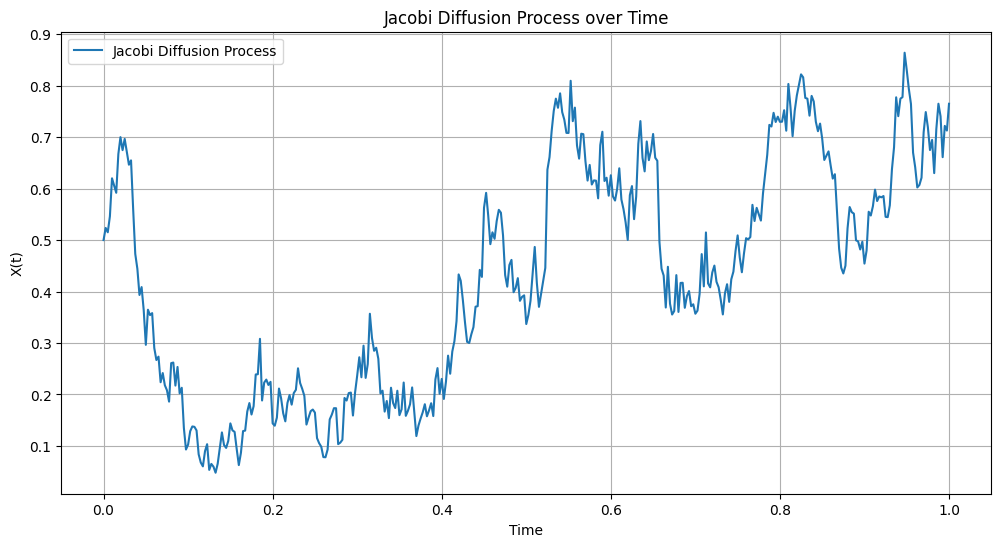

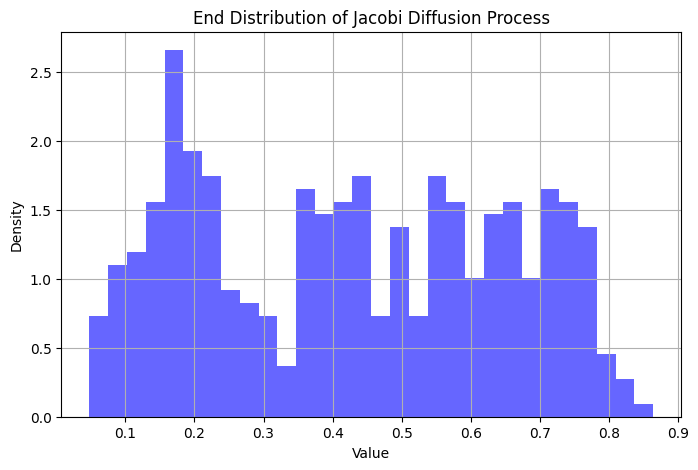

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for Jacobi diffusion
alpha = 2.0
beta = 3.0
T = 1.0  # Total time
N = 400  # Number of time steps
dt = T / N

# Initialize the Jacobi diffusion process
X = np.zeros(N + 1)
X[0] = 0.5  # Initial value

# Euler-Maruyama method to simulate Jacobi diffusion
np.random.seed(42)
for i in range(1, N + 1):
    dW = np.sqrt(dt) * np.random.randn()
    drift = alpha * (1 - X[i-1]) - beta * X[i-1]
    diffusion = np.sqrt(2 * alpha * X[i-1] * (1 - X[i-1]))
    X[i] = X[i-1] + drift * dt + diffusion * dW

# Plotting the Jacobi diffusion process
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(0, T, N + 1), X, label='Jacobi Diffusion Process')
plt.xlabel('Time')
plt.ylabel('X(t)')
plt.title('Jacobi Diffusion Process over Time')
plt.grid()
plt.legend()
plt.show()

# Plotting the end distribution
plt.figure(figsize=(8, 5))
plt.hist(X, bins=30, density=True, alpha=0.6, color='b')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('End Distribution of Jacobi Diffusion Process')
plt.grid()
plt.show()
    

C:\Users\45040\AppData\Local\Temp\ipykernel_27004\2496944929.py:17: RuntimeWarning: invalid value encountered in sqrt
  X[t, :] = X[t-1, :] + alpha * (1 - X[t-1, :]) * dt - beta * X[t-1, :] * dt + np.sqrt(X[t-1, :] * (1 - X[t-1, :])) * dW


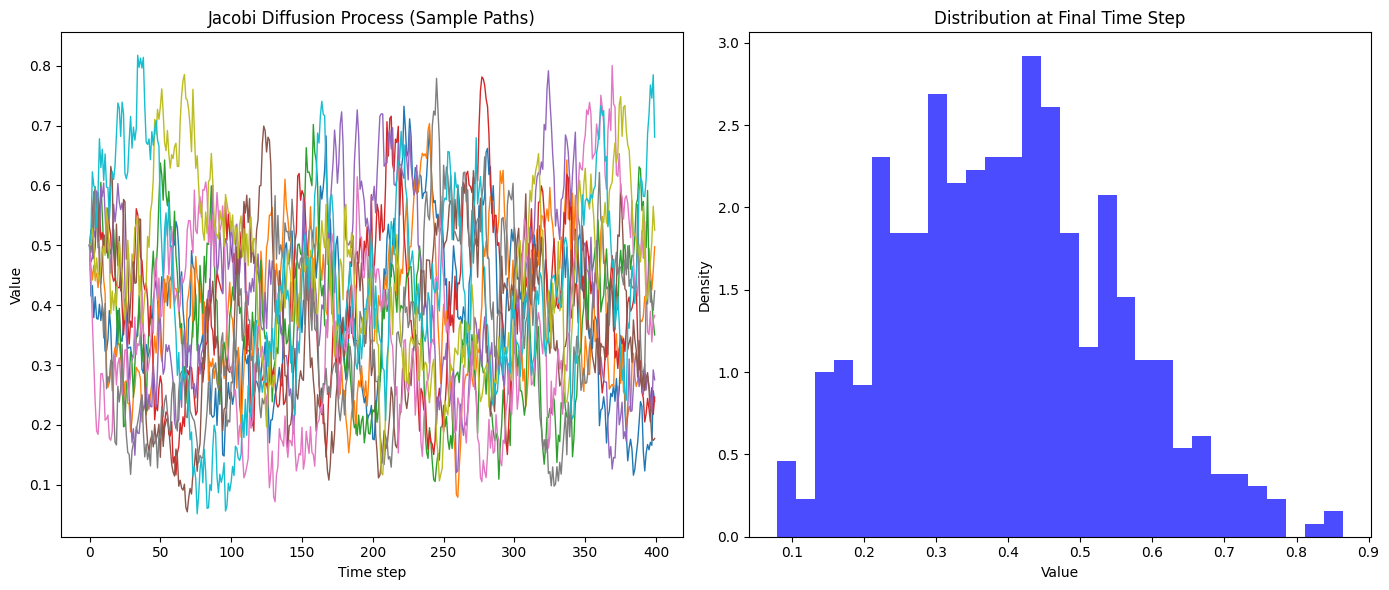

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Jacobi diffusion process
T = 400  # number of time steps
N = 500  # number of samples
dt = 0.01  # step size
alpha, beta = 2.0, 3.0  # parameters of the Jacobi diffusion process

# Initialize the process
X = np.zeros((T, N))
X[0, :] = 0.5  # initial value (e.g., starting from 0.5)

# Euler-Maruyama method to simulate the Jacobi diffusion
for t in range(1, T):
    dW = np.sqrt(dt) * np.random.randn(N)  # Brownian increments
    X[t, :] = X[t-1, :] + alpha * (1 - X[t-1, :]) * dt - beta * X[t-1, :] * dt + np.sqrt(X[t-1, :] * (1 - X[t-1, :])) * dW

# Plot the diffusion process
plt.figure(figsize=(14, 6))

# Plot a few sample paths of the diffusion process
plt.subplot(1, 2, 1)
for i in range(10):  # plot 10 sample paths
    plt.plot(X[:, i], lw=1)
plt.xlabel('Time step')
plt.ylabel('Value')
plt.title('Jacobi Diffusion Process (Sample Paths)')

# Plot the distribution at the final time step
plt.subplot(1, 2, 2)
plt.hist(X[-1, :], bins=30, density=True, alpha=0.7, color='b')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution at Final Time Step')

plt.tight_layout()
plt.show()

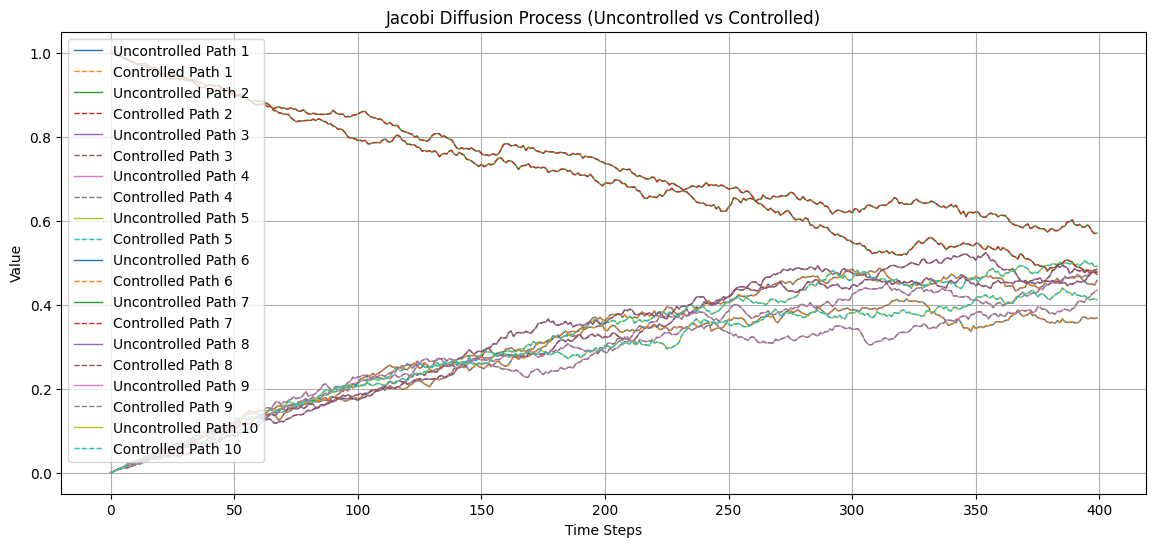

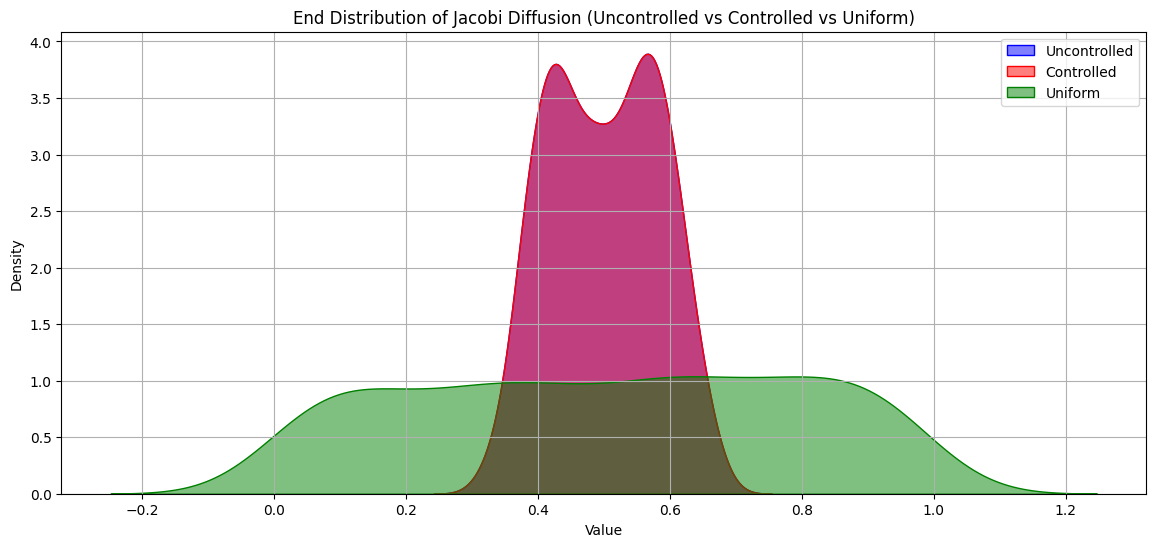

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
num_steps = 400
num_samples = 500
dt = 0.01  # Time step size

# Initial samples randomly start at 0 or 1 with 50% probability
initial_values = np.random.choice([0, 1], size=num_samples)

# Create arrays to store the diffusion process for both uncontrolled and controlled cases
jacobi_diffusion_uncontrolled = np.zeros((num_steps, num_samples))
jacobi_diffusion_controlled = np.zeros((num_steps, num_samples))

jacobi_diffusion_uncontrolled[0, :] = initial_values
jacobi_diffusion_controlled[0, :] = initial_values

# Jacobi diffusion parameters (example: drift and diffusion coefficients)
alpha = 0.5
beta = 0.5
sigma = 0.1

# Euler-Maruyama method to simulate Jacobi diffusion
for t in range(1, num_steps):
    x_t_uncontrolled = jacobi_diffusion_uncontrolled[t - 1, :]
    x_t_controlled = jacobi_diffusion_controlled[t - 1, :]

    drift = alpha * (beta - x_t_uncontrolled)  # Drift term
    diffusion = sigma * np.sqrt(x_t_uncontrolled * (1 - x_t_uncontrolled))  # Diffusion term
    dW = np.sqrt(dt) * np.random.randn(num_samples)  # Brownian increments
    
    # Uncontrolled diffusion (no boundary clamping)
    jacobi_diffusion_uncontrolled[t, :] = x_t_uncontrolled + drift * dt + diffusion * dW

    # Controlled diffusion (with clamping to enforce boundary conditions)
    x_next_controlled = x_t_controlled + drift * dt + diffusion * dW
    jacobi_diffusion_controlled[t, :] = np.clip(x_next_controlled, 0, 1)

# Plot the diffusion process for a subset of samples (uncontrolled and controlled)
plt.figure(figsize=(14, 6))
for i in range(10):  # Plot only 10 sample paths for clarity
    sns.lineplot(x=np.arange(num_steps), y=jacobi_diffusion_uncontrolled[:, i], lw=1, label=f'Uncontrolled Path {i+1}')
    sns.lineplot(x=np.arange(num_steps), y=jacobi_diffusion_controlled[:, i], lw=1, linestyle='--', label=f'Controlled Path {i+1}')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('Jacobi Diffusion Process (Uncontrolled vs Controlled)')
plt.grid(True)
plt.legend()
plt.show()

# Generate uniform distribution data
uniform_data = np.random.uniform(0, 1, num_samples)

# Plot the end distribution (uncontrolled, controlled, and uniform)
plt.figure(figsize=(14, 6))
sns.kdeplot(jacobi_diffusion_uncontrolled[-1, :], color='b', label='Uncontrolled', fill=True, alpha=0.5)
sns.kdeplot(jacobi_diffusion_controlled[-1, :], color='r', label='Controlled', fill=True, alpha=0.5)
sns.kdeplot(uniform_data, color='g', label='Uniform', fill=True, alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('End Distribution of Jacobi Diffusion (Uncontrolled vs Controlled vs Uniform)')
plt.grid(True)
plt.legend()
plt.show()

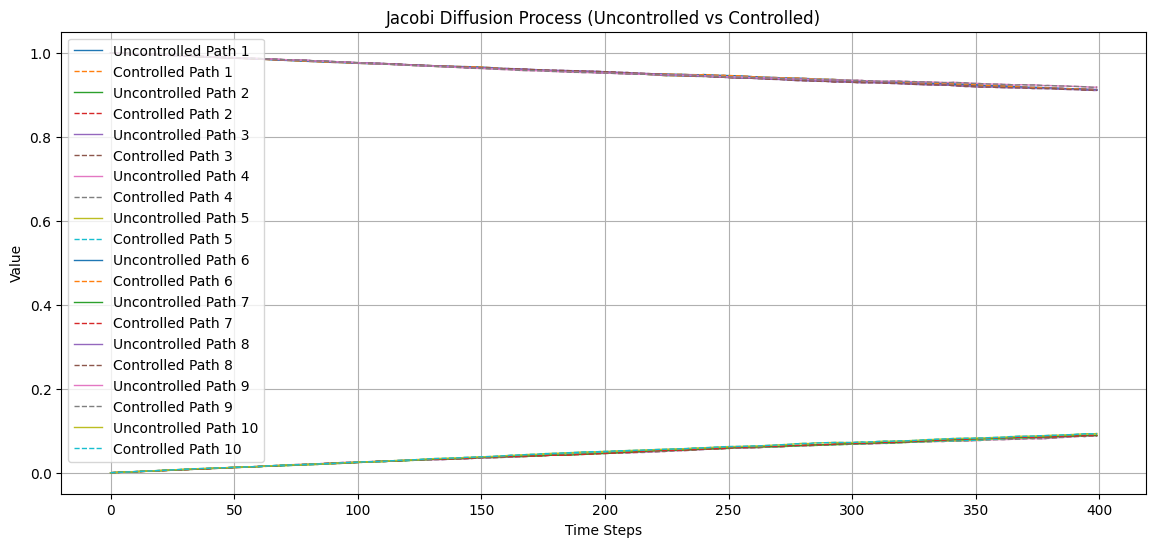

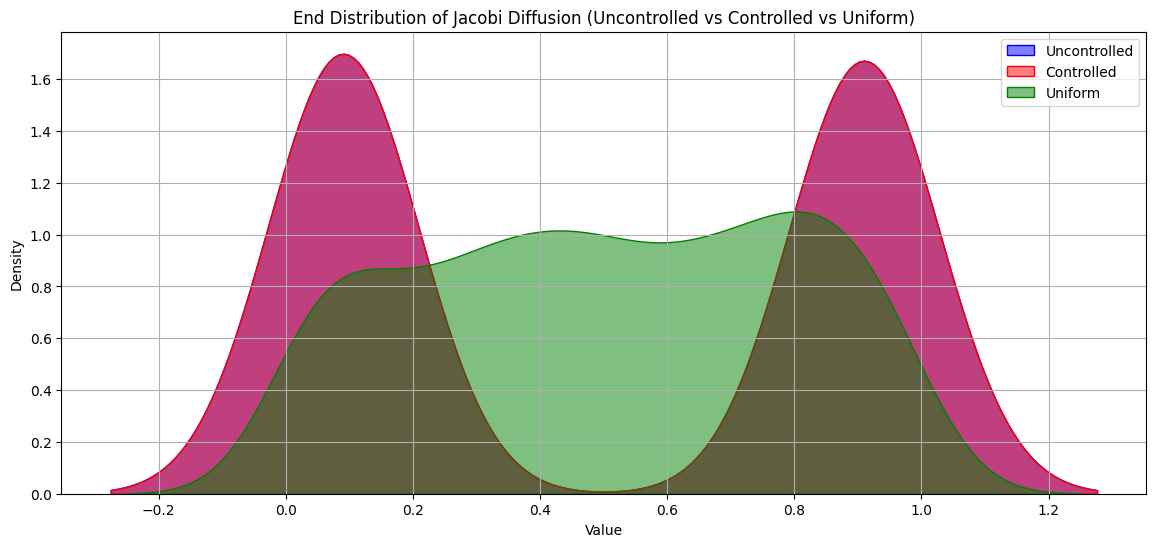

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
num_steps = 400
num_samples = 500
dt = 0.001  # Time step size

# Initial samples randomly start at 0 or 1 with 50% probability
initial_values = np.random.choice([0, 1], size=num_samples)

# Create arrays to store the diffusion process for both uncontrolled and controlled cases
jacobi_diffusion_uncontrolled = np.zeros((num_steps, num_samples))
jacobi_diffusion_controlled = np.zeros((num_steps, num_samples))

jacobi_diffusion_uncontrolled[0, :] = initial_values
jacobi_diffusion_controlled[0, :] = initial_values

# Jacobi diffusion parameters (example: drift and diffusion coefficients)
alpha = 0.5
beta = 0.5
sigma = 0.03  # Adjusted sigma to increase density

# Euler-Maruyama method to simulate Jacobi diffusion
for t in range(1, num_steps):
    x_t_uncontrolled = jacobi_diffusion_uncontrolled[t - 1, :]
    x_t_controlled = jacobi_diffusion_controlled[t - 1, :]

    drift = alpha * (beta - x_t_uncontrolled)  # Drift term
    diffusion = sigma * np.sqrt(x_t_uncontrolled * (1 - x_t_uncontrolled))  # Diffusion term
    dW = np.sqrt(dt) * np.random.randn(num_samples)  # Brownian increments
    
    # Uncontrolled diffusion (no boundary clamping)
    jacobi_diffusion_uncontrolled[t, :] = x_t_uncontrolled + drift * dt + diffusion * dW

    # Controlled diffusion (with clamping to enforce boundary conditions)
    x_next_controlled = x_t_controlled + drift * dt + diffusion * dW
    jacobi_diffusion_controlled[t, :] = np.clip(x_next_controlled, 0, 1)

# Plot the diffusion process for a subset of samples (uncontrolled and controlled)
plt.figure(figsize=(14, 6))
for i in range(10):  # Plot only 10 sample paths for clarity
    sns.lineplot(x=np.arange(num_steps), y=jacobi_diffusion_uncontrolled[:, i], lw=1, label=f'Uncontrolled Path {i+1}')
    sns.lineplot(x=np.arange(num_steps), y=jacobi_diffusion_controlled[:, i], lw=1, linestyle='--', label=f'Controlled Path {i+1}')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('Jacobi Diffusion Process (Uncontrolled vs Controlled)')
plt.grid(True)
plt.legend()
plt.show()

# Generate uniform distribution data
uniform_data = np.random.uniform(0, 1, num_samples)

# Plot the end distribution (uncontrolled, controlled, and uniform)
plt.figure(figsize=(14, 6))
sns.kdeplot(jacobi_diffusion_uncontrolled[-1, :], color='b', label='Uncontrolled', fill=True, alpha=0.5)
sns.kdeplot(jacobi_diffusion_controlled[-1, :], color='r', label='Controlled', fill=True, alpha=0.5)
sns.kdeplot(uniform_data, color='g', label='Uniform', fill=True, alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('End Distribution of Jacobi Diffusion (Uncontrolled vs Controlled vs Uniform)')
plt.grid(True)
plt.legend()
plt.show()

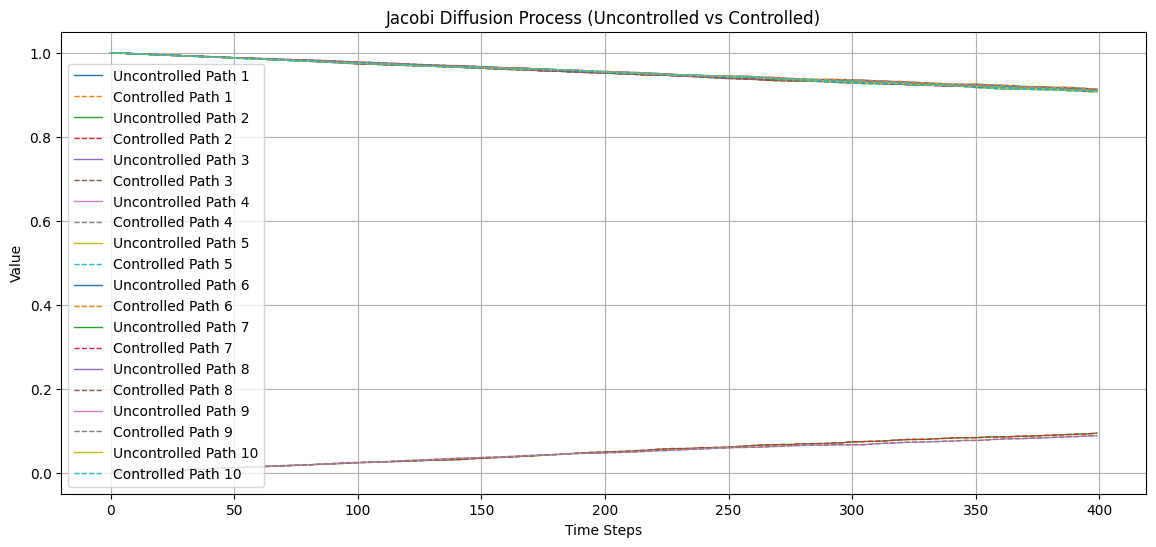

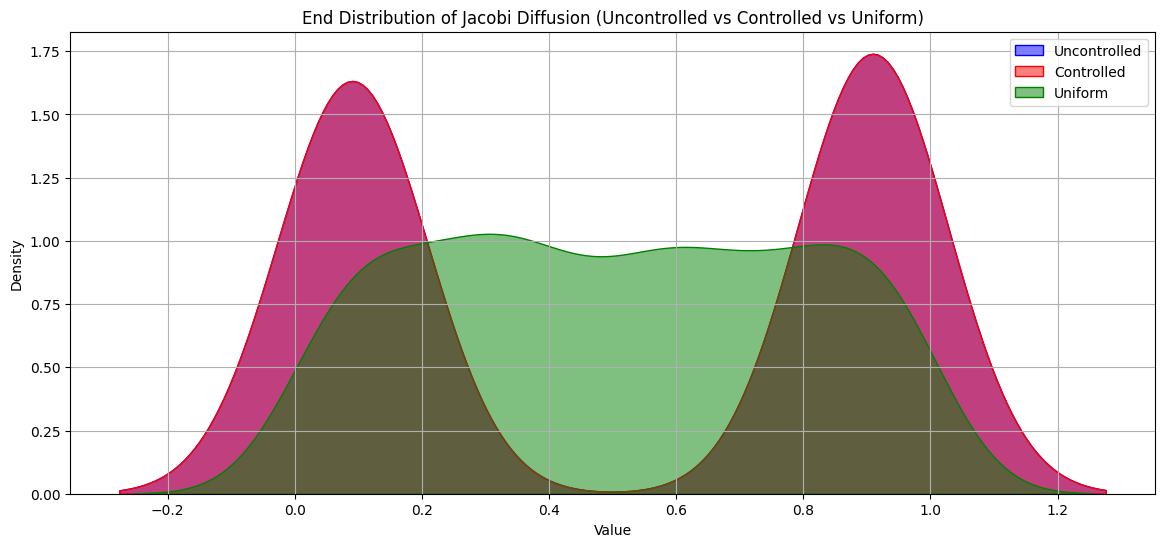

Percentage of uncontrolled samples out of [0, 1] range: 0.00%
Percentage of controlled samples out of [0, 1] range: 0.00%


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
num_steps = 400
num_samples = 500
dt = 0.001  # Time step size

# Initial samples randomly start at 0 or 1 with 50% probability
initial_values = np.random.choice([0, 1], size=num_samples)

# Create arrays to store the diffusion process for both uncontrolled and controlled cases
jacobi_diffusion_uncontrolled = np.zeros((num_steps, num_samples))
jacobi_diffusion_controlled = np.zeros((num_steps, num_samples))

jacobi_diffusion_uncontrolled[0, :] = initial_values
jacobi_diffusion_controlled[0, :] = initial_values

# Jacobi diffusion parameters (example: drift and diffusion coefficients)
alpha = 0.5
beta = 0.5
sigma = 0.03  # Adjusted sigma to increase density

# Euler-Maruyama method to simulate Jacobi diffusion
for t in range(1, num_steps):
    x_t_uncontrolled = jacobi_diffusion_uncontrolled[t - 1, :]
    x_t_controlled = jacobi_diffusion_controlled[t - 1, :]

    drift = alpha * (beta - x_t_uncontrolled)  # Drift term
    diffusion = sigma * np.sqrt(x_t_uncontrolled * (1 - x_t_uncontrolled))  # Diffusion term
    dW = np.sqrt(dt) * np.random.randn(num_samples)  # Brownian increments
    
    # Uncontrolled diffusion (no boundary clamping)
    jacobi_diffusion_uncontrolled[t, :] = x_t_uncontrolled + drift * dt + diffusion * dW

    # Controlled diffusion (with clamping to enforce boundary conditions)
    x_next_controlled = x_t_controlled + drift * dt + diffusion * dW
    jacobi_diffusion_controlled[t, :] = np.clip(x_next_controlled, 0, 1)

# Plot the diffusion process for a subset of samples (uncontrolled and controlled)
plt.figure(figsize=(14, 6))
for i in range(10):  # Plot only 10 sample paths for clarity
    sns.lineplot(x=np.arange(num_steps), y=jacobi_diffusion_uncontrolled[:, i], lw=1, label=f'Uncontrolled Path {i+1}')
    sns.lineplot(x=np.arange(num_steps), y=jacobi_diffusion_controlled[:, i], lw=1, linestyle='--', label=f'Controlled Path {i+1}')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('Jacobi Diffusion Process (Uncontrolled vs Controlled)')
plt.grid(True)
plt.legend()
plt.show()

# Generate uniform distribution data
uniform_data = np.random.uniform(0, 1, num_samples)

# Plot the end distribution (uncontrolled, controlled, and uniform)
plt.figure(figsize=(14, 6))
sns.kdeplot(jacobi_diffusion_uncontrolled[-1, :], color='b', label='Uncontrolled', fill=True, alpha=0.5)
sns.kdeplot(jacobi_diffusion_controlled[-1, :], color='r', label='Controlled', fill=True, alpha=0.5)
sns.kdeplot(uniform_data, color='g', label='Uniform', fill=True, alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('End Distribution of Jacobi Diffusion (Uncontrolled vs Controlled vs Uniform)')
plt.grid(True)
plt.legend()
plt.show()

# Calculate the percentage of samples not in the uniform distribution range [0, 1]
uncontrolled_out_of_range = np.sum((jacobi_diffusion_uncontrolled[-1, :] < 0) | (jacobi_diffusion_uncontrolled[-1, :] > 1))
controlled_out_of_range = np.sum((jacobi_diffusion_controlled[-1, :] < 0) | (jacobi_diffusion_controlled[-1, :] > 1))

uncontrolled_percentage = (uncontrolled_out_of_range / num_samples) * 100
controlled_percentage = (controlled_out_of_range / num_samples) * 100

print(f'Percentage of uncontrolled samples out of [0, 1] range: {uncontrolled_percentage:.2f}%')
print(f'Percentage of controlled samples out of [0, 1] range: {controlled_percentage:.2f}%')

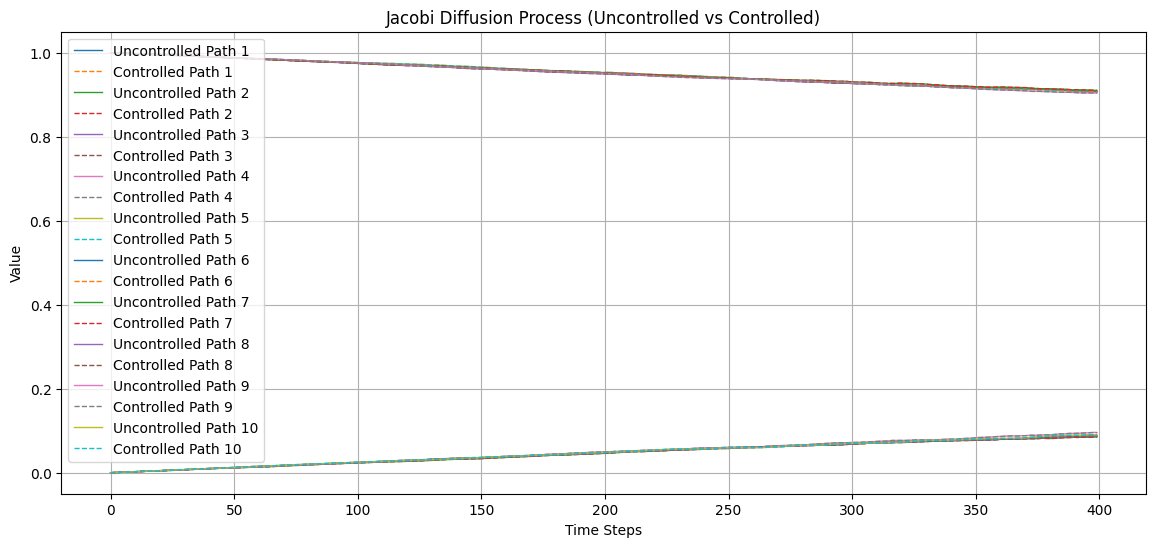

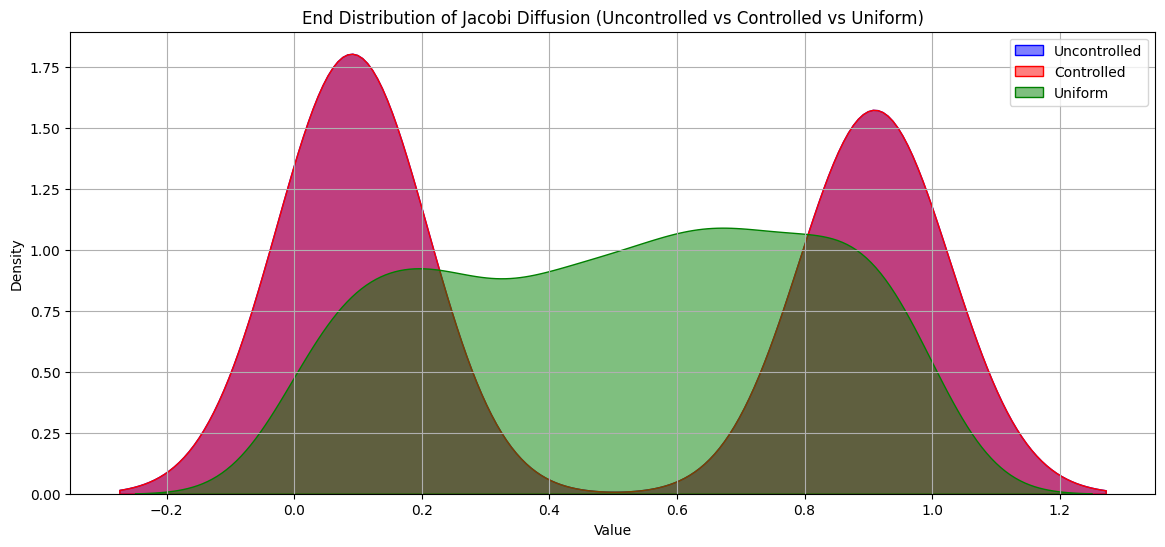

Percentage of uncontrolled samples out of [0, 1] range: 0.00%
Percentage of controlled samples out of [0, 1] range: 0.00%
Min and Max of uncontrolled diffusion: 0.08012092785748899, 0.917775735694226
Min and Max of controlled diffusion: 0.08012092785748899, 0.917775735694226


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
num_steps = 400
num_samples = 500
dt = 0.001  # Time step size

# Initial samples randomly start at 0 or 1 with 50% probability
initial_values = np.random.choice([0, 1], size=num_samples)

# Create arrays to store the diffusion process for both uncontrolled and controlled cases
jacobi_diffusion_uncontrolled = np.zeros((num_steps, num_samples))
jacobi_diffusion_controlled = np.zeros((num_steps, num_samples))

jacobi_diffusion_uncontrolled[0, :] = initial_values
jacobi_diffusion_controlled[0, :] = initial_values

# Jacobi diffusion parameters (example: drift and diffusion coefficients)
alpha = 0.5
beta = 0.5
sigma = 0.03  # Adjusted sigma to increase density

# Euler-Maruyama method to simulate Jacobi diffusion
for t in range(1, num_steps):
    x_t_uncontrolled = jacobi_diffusion_uncontrolled[t - 1, :]
    x_t_controlled = jacobi_diffusion_controlled[t - 1, :]

    drift = alpha * (beta - x_t_uncontrolled)  # Drift term
    diffusion = sigma * np.sqrt(x_t_uncontrolled * (1 - x_t_uncontrolled))  # Diffusion term
    dW = np.sqrt(dt) * np.random.randn(num_samples)  # Brownian increments
    
    # Uncontrolled diffusion (no boundary clamping)
    jacobi_diffusion_uncontrolled[t, :] = x_t_uncontrolled + drift * dt + diffusion * dW

    # Controlled diffusion (with clamping to enforce boundary conditions)
    x_next_controlled = x_t_controlled + drift * dt + diffusion * dW
    jacobi_diffusion_controlled[t, :] = np.clip(x_next_controlled, 0, 1)

# Plot the diffusion process for a subset of samples (uncontrolled and controlled)
plt.figure(figsize=(14, 6))
for i in range(10):  # Plot only 10 sample paths for clarity
    sns.lineplot(x=np.arange(num_steps), y=jacobi_diffusion_uncontrolled[:, i], lw=1, label=f'Uncontrolled Path {i+1}')
    sns.lineplot(x=np.arange(num_steps), y=jacobi_diffusion_controlled[:, i], lw=1, linestyle='--', label=f'Controlled Path {i+1}')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('Jacobi Diffusion Process (Uncontrolled vs Controlled)')
plt.grid(True)
plt.legend()
plt.show()

# Generate uniform distribution data
uniform_data = np.random.uniform(0, 1, num_samples)

# Plot the end distribution (uncontrolled, controlled, and uniform)
plt.figure(figsize=(14, 6))
sns.kdeplot(jacobi_diffusion_uncontrolled[-1, :], color='b', label='Uncontrolled', fill=True, alpha=0.5)
sns.kdeplot(jacobi_diffusion_controlled[-1, :], color='r', label='Controlled', fill=True, alpha=0.5)
sns.kdeplot(uniform_data, color='g', label='Uniform', fill=True, alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('End Distribution of Jacobi Diffusion (Uncontrolled vs Controlled vs Uniform)')
plt.grid(True)
plt.legend()
plt.show()

# Calculate the percentage of samples not in the uniform distribution range [0, 1]
uncontrolled_out_of_range = np.sum((jacobi_diffusion_uncontrolled[-1, :] < 0) | (jacobi_diffusion_uncontrolled[-1, :] > 1))
controlled_out_of_range = np.sum((jacobi_diffusion_controlled[-1, :] < 0) | (jacobi_diffusion_controlled[-1, :] > 1))

uncontrolled_percentage = (uncontrolled_out_of_range / num_samples) * 100
controlled_percentage = (controlled_out_of_range / num_samples) * 100

print(f'Percentage of uncontrolled samples out of [0, 1] range: {uncontrolled_percentage:.2f}%')
print(f'Percentage of controlled samples out of [0, 1] range: {controlled_percentage:.2f}%')

# Debugging: Check the range of values
print(f'Min and Max of uncontrolled diffusion: {jacobi_diffusion_uncontrolled[-1, :].min()}, {jacobi_diffusion_uncontrolled[-1, :].max()}')
print(f'Min and Max of controlled diffusion: {jacobi_diffusion_controlled[-1, :].min()}, {jacobi_diffusion_controlled[-1, :].max()}')

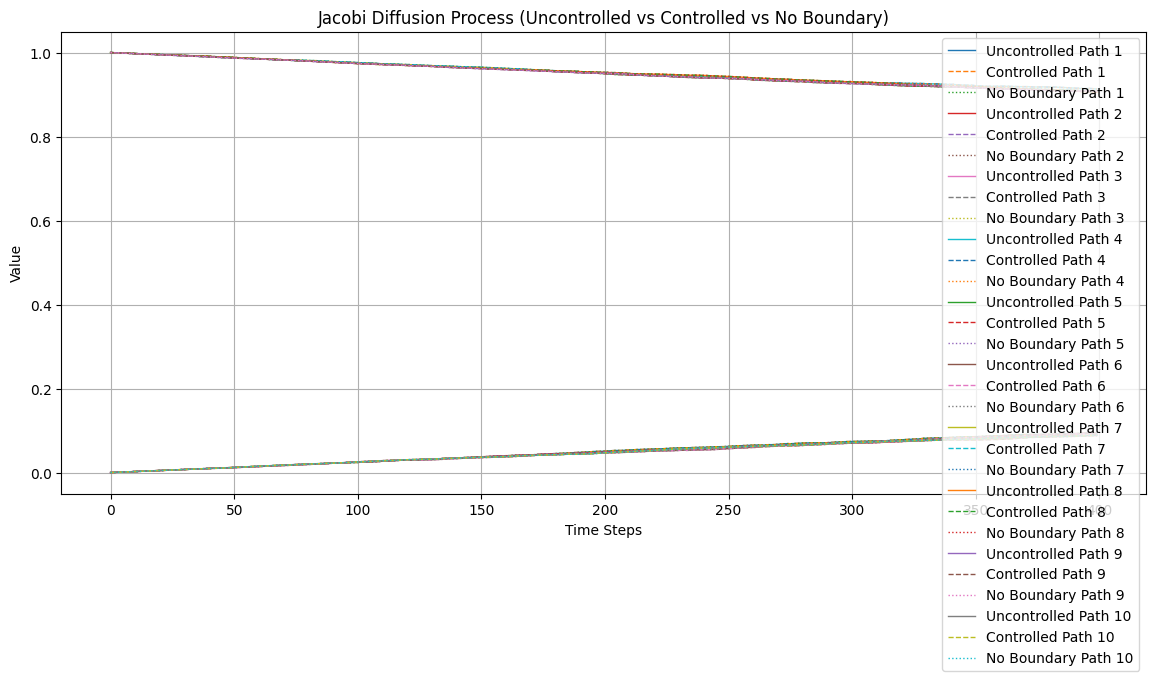

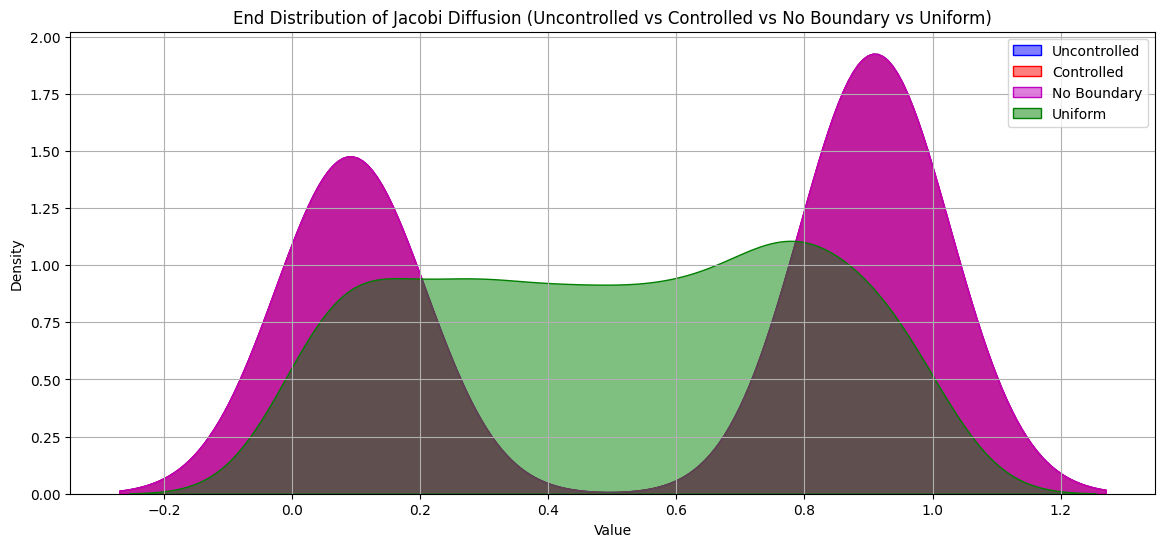

Percentage of uncontrolled samples out of [0, 1] range: 0.00%
Percentage of controlled samples out of [0, 1] range: 0.00%
Percentage of no boundary samples out of [0, 1] range: 0.00%
Min and Max of uncontrolled diffusion: 0.081927445219363, 0.9187198747672217
Min and Max of controlled diffusion: 0.081927445219363, 0.9187198747672217
Min and Max of no boundary diffusion: 0.081927445219363, 0.9187198747672217


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
num_steps = 400
num_samples = 500
dt = 0.001  # Time step size

# Initial samples randomly start at 0 or 1 with 50% probability
initial_values = np.random.choice([0, 1], size=num_samples)

# Create arrays to store the diffusion process for both uncontrolled and controlled cases
jacobi_diffusion_uncontrolled = np.zeros((num_steps, num_samples))
jacobi_diffusion_controlled = np.zeros((num_steps, num_samples))
jacobi_diffusion_no_boundary = np.zeros((num_steps, num_samples))

jacobi_diffusion_uncontrolled[0, :] = initial_values
jacobi_diffusion_controlled[0, :] = initial_values
jacobi_diffusion_no_boundary[0, :] = initial_values

# Jacobi diffusion parameters (example: drift and diffusion coefficients)
alpha = 0.5
beta = 0.5
sigma = 0.03  # Adjusted sigma to increase density

# Euler-Maruyama method to simulate Jacobi diffusion
for t in range(1, num_steps):
    x_t_uncontrolled = jacobi_diffusion_uncontrolled[t - 1, :]
    x_t_controlled = jacobi_diffusion_controlled[t - 1, :]
    x_t_no_boundary = jacobi_diffusion_no_boundary[t - 1, :]

    drift = alpha * (beta - x_t_uncontrolled)  # Drift term
    diffusion = sigma * np.sqrt(x_t_uncontrolled * (1 - x_t_uncontrolled))  # Diffusion term
    dW = np.sqrt(dt) * np.random.randn(num_samples)  # Brownian increments
    
    # Uncontrolled diffusion (no boundary clamping)
    jacobi_diffusion_uncontrolled[t, :] = x_t_uncontrolled + drift * dt + diffusion * dW

    # Controlled diffusion (with clamping to enforce boundary conditions)
    x_next_controlled = x_t_controlled + drift * dt + diffusion * dW
    jacobi_diffusion_controlled[t, :] = np.clip(x_next_controlled, 0, 1)

    # No boundary diffusion (without clamping)
    jacobi_diffusion_no_boundary[t, :] = x_t_no_boundary + drift * dt + diffusion * dW

# Plot the diffusion process for a subset of samples (uncontrolled, controlled, and no boundary)
plt.figure(figsize=(14, 6))
for i in range(10):  # Plot only 10 sample paths for clarity
    sns.lineplot(x=np.arange(num_steps), y=jacobi_diffusion_uncontrolled[:, i], lw=1, label=f'Uncontrolled Path {i+1}')
    sns.lineplot(x=np.arange(num_steps), y=jacobi_diffusion_controlled[:, i], lw=1, linestyle='--', label=f'Controlled Path {i+1}')
    sns.lineplot(x=np.arange(num_steps), y=jacobi_diffusion_no_boundary[:, i], lw=1, linestyle=':', label=f'No Boundary Path {i+1}')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('Jacobi Diffusion Process (Uncontrolled vs Controlled vs No Boundary)')
plt.grid(True)
plt.legend()
plt.show()

# Generate uniform distribution data
uniform_data = np.random.uniform(0, 1, num_samples)

# Plot the end distribution (uncontrolled, controlled, no boundary, and uniform)
plt.figure(figsize=(14, 6))
sns.kdeplot(jacobi_diffusion_uncontrolled[-1, :], color='b', label='Uncontrolled', fill=True, alpha=0.5)
sns.kdeplot(jacobi_diffusion_controlled[-1, :], color='r', label='Controlled', fill=True, alpha=0.5)
sns.kdeplot(jacobi_diffusion_no_boundary[-1, :], color='m', label='No Boundary', fill=True, alpha=0.5)
sns.kdeplot(uniform_data, color='g', label='Uniform', fill=True, alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('End Distribution of Jacobi Diffusion (Uncontrolled vs Controlled vs No Boundary vs Uniform)')
plt.grid(True)
plt.legend()
plt.show()

# Calculate the percentage of samples not in the uniform distribution range [0, 1]
uncontrolled_out_of_range = np.sum((jacobi_diffusion_uncontrolled[-1, :] < 0) | (jacobi_diffusion_uncontrolled[-1, :] > 1))
controlled_out_of_range = np.sum((jacobi_diffusion_controlled[-1, :] < 0) | (jacobi_diffusion_controlled[-1, :] > 1))
no_boundary_out_of_range = np.sum((jacobi_diffusion_no_boundary[-1, :] < 0) | (jacobi_diffusion_no_boundary[-1, :] > 1))

uncontrolled_percentage = (uncontrolled_out_of_range / num_samples) * 100
controlled_percentage = (controlled_out_of_range / num_samples) * 100
no_boundary_percentage = (no_boundary_out_of_range / num_samples) * 100

print(f'Percentage of uncontrolled samples out of [0, 1] range: {uncontrolled_percentage:.2f}%')
print(f'Percentage of controlled samples out of [0, 1] range: {controlled_percentage:.2f}%')
print(f'Percentage of no boundary samples out of [0, 1] range: {no_boundary_percentage:.2f}%')

# Debugging: Check the range of values
print(f'Min and Max of uncontrolled diffusion: {jacobi_diffusion_uncontrolled[-1, :].min()}, {jacobi_diffusion_uncontrolled[-1, :].max()}')
print(f'Min and Max of controlled diffusion: {jacobi_diffusion_controlled[-1, :].min()}, {jacobi_diffusion_controlled[-1, :].max()}')
print(f'Min and Max of no boundary diffusion: {jacobi_diffusion_no_boundary[-1, :].min()}, {jacobi_diffusion_no_boundary[-1, :].max()}')

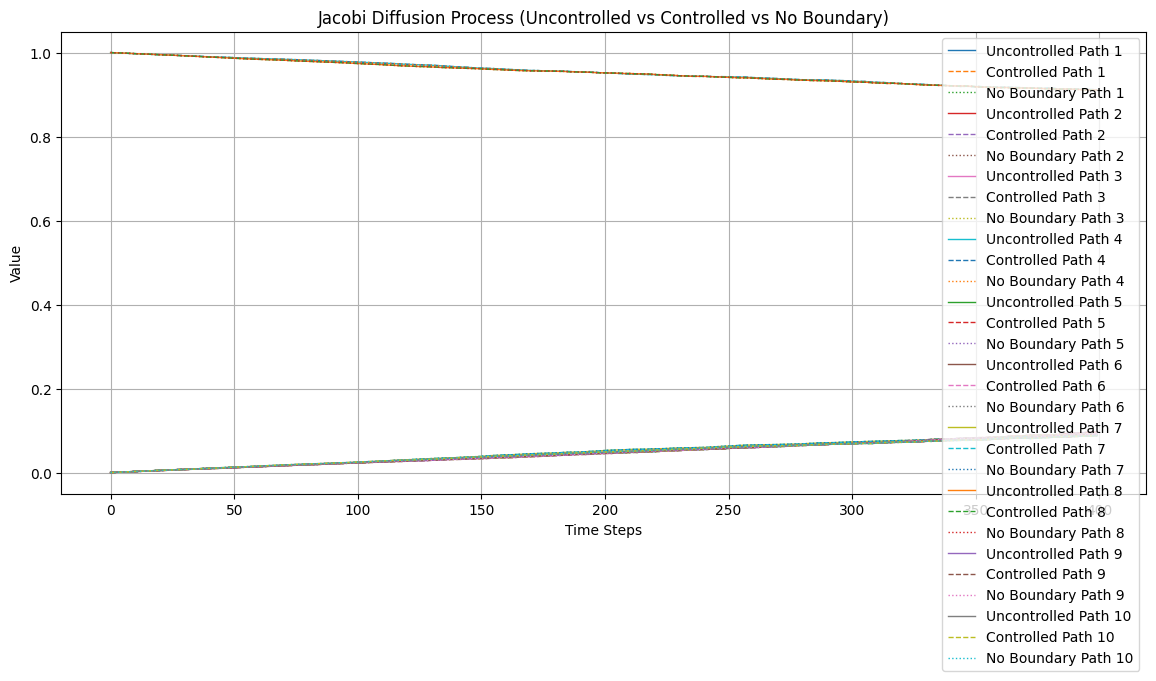

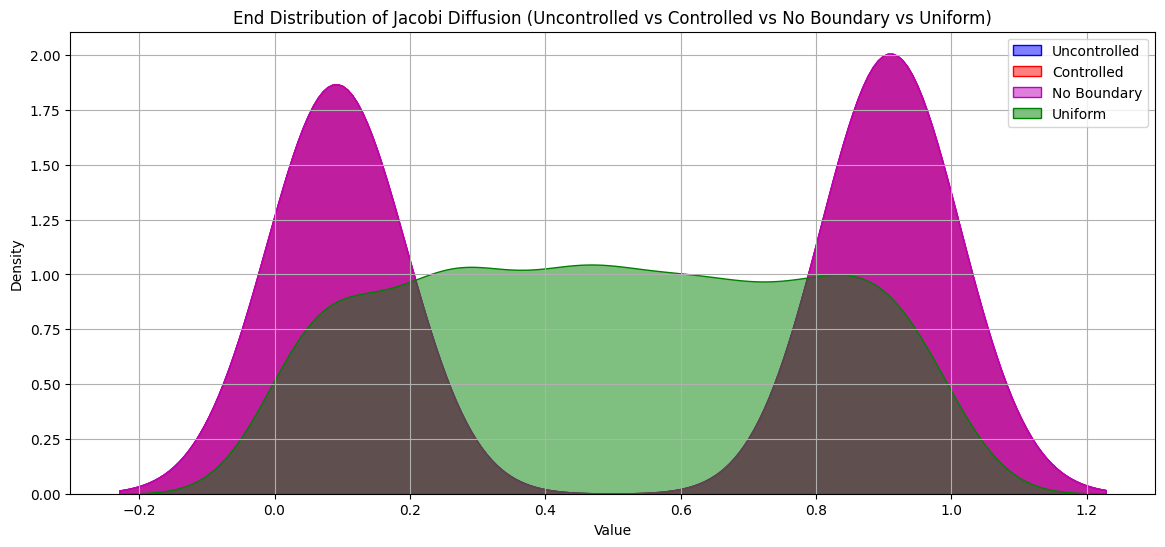

Percentage of uncontrolled samples out of [0, 1] range: 0.00%
Percentage of controlled samples out of [0, 1] range: 0.00%
Percentage of no boundary samples out of [0, 1] range: 0.00%
Min and Max of uncontrolled diffusion: 0.07928964368131762, 0.9194653104369653
Min and Max of controlled diffusion: 0.07928964368131762, 0.9194653104369653
Min and Max of no boundary diffusion: 0.07928964368131762, 0.9194653104369653


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
num_steps = 400
num_samples = 1000
dt = 0.001  # Time step size

# Initial samples randomly start at 0 or 1 with 50% probability
initial_values = np.random.choice([0, 1], size=num_samples)

# Create arrays to store the diffusion process for both uncontrolled and controlled cases
jacobi_diffusion_uncontrolled = np.zeros((num_steps, num_samples))
jacobi_diffusion_controlled = np.zeros((num_steps, num_samples))
jacobi_diffusion_no_boundary = np.zeros((num_steps, num_samples))

jacobi_diffusion_uncontrolled[0, :] = initial_values
jacobi_diffusion_controlled[0, :] = initial_values
jacobi_diffusion_no_boundary[0, :] = initial_values

# Jacobi diffusion parameters (example: drift and diffusion coefficients)
alpha = 0.5
beta = 0.5
sigma = 0.03  # Adjusted sigma to increase density

# Euler-Maruyama method to simulate Jacobi diffusion
for t in range(1, num_steps):
    x_t_uncontrolled = jacobi_diffusion_uncontrolled[t - 1, :]
    x_t_controlled = jacobi_diffusion_controlled[t - 1, :]
    x_t_no_boundary = jacobi_diffusion_no_boundary[t - 1, :]

    drift = alpha * (beta - x_t_uncontrolled)  # Drift term
    diffusion = sigma * np.sqrt(x_t_uncontrolled * (1 - x_t_uncontrolled))  # Diffusion term
    dW = np.sqrt(dt) * np.random.randn(num_samples)  # Brownian increments
    
    # Uncontrolled diffusion (no boundary clamping)
    jacobi_diffusion_uncontrolled[t, :] = x_t_uncontrolled + drift * dt + diffusion * dW

    # Controlled diffusion (with clamping to enforce boundary conditions)
    x_next_controlled = x_t_controlled + drift * dt + diffusion * dW
    jacobi_diffusion_controlled[t, :] = np.clip(x_next_controlled, 0, 1)

    # No boundary diffusion (without clamping)
    jacobi_diffusion_no_boundary[t, :] = x_t_no_boundary + drift * dt + diffusion * dW

# Plot the diffusion process for a subset of samples (uncontrolled, controlled, and no boundary)
plt.figure(figsize=(14, 6))
for i in range(10):  # Plot only 10 sample paths for clarity
    sns.lineplot(x=np.arange(num_steps), y=jacobi_diffusion_uncontrolled[:, i], lw=1, label=f'Uncontrolled Path {i+1}')
    sns.lineplot(x=np.arange(num_steps), y=jacobi_diffusion_controlled[:, i], lw=1, linestyle='--', label=f'Controlled Path {i+1}')
    sns.lineplot(x=np.arange(num_steps), y=jacobi_diffusion_no_boundary[:, i], lw=1, linestyle=':', label=f'No Boundary Path {i+1}')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('Jacobi Diffusion Process (Uncontrolled vs Controlled vs No Boundary)')
plt.grid(True)
plt.legend()
plt.show()

# Generate uniform distribution data
uniform_data = np.random.uniform(0, 1, num_samples)

# Plot the end distribution (uncontrolled, controlled, no boundary, and uniform)
plt.figure(figsize=(14, 6))
sns.kdeplot(jacobi_diffusion_uncontrolled[-1, :], color='b', label='Uncontrolled', fill=True, alpha=0.5)
sns.kdeplot(jacobi_diffusion_controlled[-1, :], color='r', label='Controlled', fill=True, alpha=0.5)
sns.kdeplot(jacobi_diffusion_no_boundary[-1, :], color='m', label='No Boundary', fill=True, alpha=0.5)
sns.kdeplot(uniform_data, color='g', label='Uniform', fill=True, alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('End Distribution of Jacobi Diffusion (Uncontrolled vs Controlled vs No Boundary vs Uniform)')
plt.grid(True)
plt.legend()
plt.show()

# Calculate the percentage of samples not in the uniform distribution range [0, 1]
uncontrolled_out_of_range = np.sum((jacobi_diffusion_uncontrolled[-1, :] < 0) | (jacobi_diffusion_uncontrolled[-1, :] > 1))
controlled_out_of_range = np.sum((jacobi_diffusion_controlled[-1, :] < 0) | (jacobi_diffusion_controlled[-1, :] > 1))
no_boundary_out_of_range = np.sum((jacobi_diffusion_no_boundary[-1, :] < 0) | (jacobi_diffusion_no_boundary[-1, :] > 1))

uncontrolled_percentage = (uncontrolled_out_of_range / num_samples) * 100
controlled_percentage = (controlled_out_of_range / num_samples) * 100
no_boundary_percentage = (no_boundary_out_of_range / num_samples) * 100

print(f'Percentage of uncontrolled samples out of [0, 1] range: {uncontrolled_percentage:.2f}%')
print(f'Percentage of controlled samples out of [0, 1] range: {controlled_percentage:.2f}%')
print(f'Percentage of no boundary samples out of [0, 1] range: {no_boundary_percentage:.2f}%')

# Debugging: Check the range of values
print(f'Min and Max of uncontrolled diffusion: {jacobi_diffusion_uncontrolled[-1, :].min()}, {jacobi_diffusion_uncontrolled[-1, :].max()}')
print(f'Min and Max of controlled diffusion: {jacobi_diffusion_controlled[-1, :].min()}, {jacobi_diffusion_controlled[-1, :].max()}')
print(f'Min and Max of no boundary diffusion: {jacobi_diffusion_no_boundary[-1, :].min()}, {jacobi_diffusion_no_boundary[-1, :].max()}')